<a href="https://colab.research.google.com/github/statmike/Logistic-Regression/blob/main/01_Logistic_Regression_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression - a Primer

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk

### Linear Regression

I will make the assumption that we are familiar with [linear regression](https://en.wikipedia.org/wiki/Linear_regression) in the typical form:

<center>
$y_{i} = \beta_{0} + \beta_{1} x_{i1} + ... + \beta_{p} x_{ip} + \epsilon_{i}$

or

$y_{i} = x_{i}^{T}\beta + \epsilon_{i}$

or

$y = X\beta + \epsilon$
</center>

Where, of particular note, the $y_{i}$ are scalar (have direction and magnitude).

### Motivate Logistic Regression
Ahh, that sticky little detail of $y_{i}$ being a scalar is easy to slide past.  But, what happens when $y$ only has two possible values, say, 0 and 1.

Let's take a quick look:

In [ ]:
# Make some data where y=0,1 for a range of x's - let y=1 be more likely as x increases
x = np.random.randn(100)
p = 1 / (1+np.exp(-1*(5*x)))
y = np.random.binomial(1,p,100)

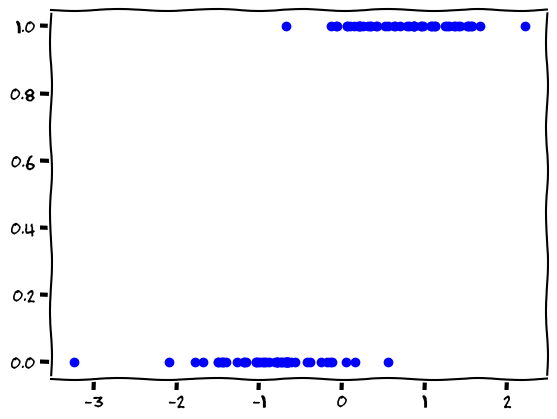

In [ ]:
# Take a look
plt.rcdefaults()
plt.xkcd()
plt.scatter(x,y,color='blue')

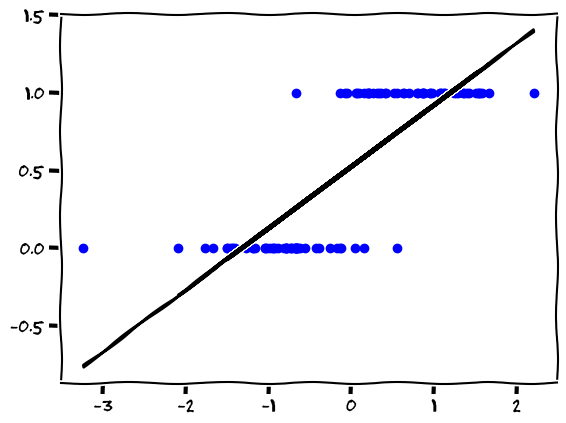

In [ ]:
# Fit a Linear Regression
linearReg = sk.linear_model.LinearRegression()
x = x.reshape(-1,1)
fit = linearReg.fit(x,y)
y_pred = fit.predict(x)

plt.scatter(x,y,color='blue')
plt.plot(x,y_pred,color='black')

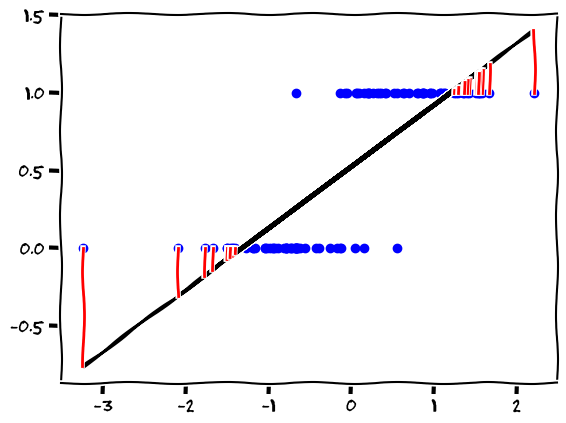

In [ ]:
# Highlight the errant predictions
plt.scatter(x,y,color='blue')
plt.plot(x,y_pred,color='black')
for i in range(0,len(y)):
  if y_pred[i]<0 or y_pred[i]>1:
    plt.plot(np.repeat(x[i],2),[y[i],y_pred[i]],color='red')

So, what can we do to prevent this?

### From Linear to Logistic Regression - the ***link***

We need a linear classifier.  In this case, we still use a familiar linear function:
<center>
$y_{i} = \beta_{0} + \beta_{1} x_{i1} + ... + \beta_{p} x_{ip} + \epsilon_{i}$
</center>

Let's write this as a function of $x$, $f(x)$ and call it **logit** - get it? Logit Regression, another name for Logistic Regression. 
 <center>
$f(x) = \beta_{0} + \beta_{1} x_{1} + ... + \beta_{p} x_{p} + \epsilon_{i}$
</center>

Now, the logistic regression function $p(x)$ is the application of a special sigmoid function, called the **logistic function**, to the **logit**:
<center>
$p(x) = \frac{1}{1 + exp(-f(x))}$
</center>

Ok, the math is clear but a sigmoid, this particular sigmoid? Why? 

Well, a sigmoid is an "s" shaped curve.  The **logistic function** is a special sigmoid in that it:
- forces a maximum value of 1 (see the numerator)
- uses $f(x)$, the **logit**, to determine steepness and the midpoint
- returns a value between 0 and 1 = the probability of being in the event class of the response = $y$. Yes, Yes, Yes!!! 

Wait, a **logit**, how did we get here? How do we get back? Can we get back?
- **logit** is an abbreviation of **log**istic un**it**
- It is the log of the odds, log-odds.  Where odds are $\frac{p}{1-p}$. Hey, our logistic function is $p(x)$!!!
- $logit(p(x)) = ln(\frac{p(x)}{1-p(x)}) = ... =\beta_{0} + \beta_{1} x_{1} + ... + \beta_{p} x_{p} + \epsilon_{i}$

Hmm, a lot of jargon, make it useful please:
- $p(x)$ is the probability of a case.  Above 0.50 and we predict it is a case.
- the odds of $y$ being a case are 
$e^{(log-odds)}$ = $e^{logit}$ = $e^{\beta_{0} + \beta_{1} x_{1} + ... + \beta_{p} x_{p} + \epsilon_{i}}$
- This is the link between the linear regression expression and the odds of the dependent variable being a case!  In statistics this is called a link function, in this case the logit link.


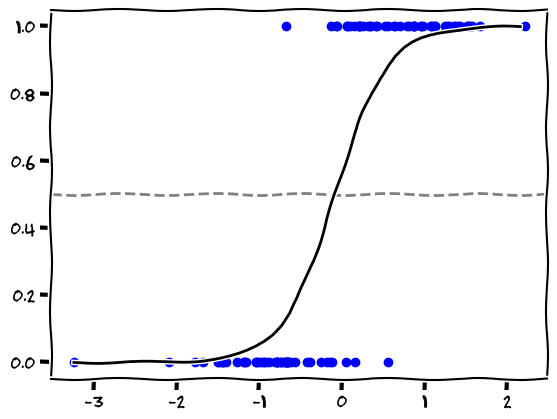

In [ ]:
logisticReg = sk.linear_model.LogisticRegression()

fit2 = logisticReg.fit(x,y)
x2 = np.arange(np.min(x),np.max(x),.1).reshape(-1,1)
y_pred2 = fit2.predict_proba(x2)

plt.axhline(0.5,color='gray', linestyle='--')
plt.scatter(x,y,color='blue')
plt.plot(x2,y_pred2[:,1],color='black')

In [ ]:
#Y =0.5 when the logit = 0, so 0 = int + beta*X and solve for X
midX = -fit2.intercept_[0]/fit2.coef_[0][0]

In [ ]:
y = y.reshape(-1,1)
hits = np.zeros(x.shape,dtype=bool)
hits[np.where(((x<=midX) & (y==0)) | ((x>=midX) & (y==1)))] = True

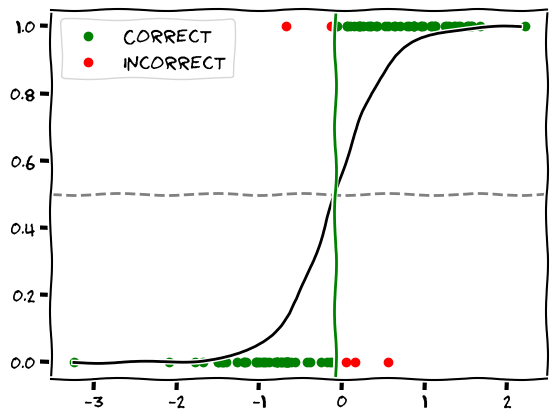

In [ ]:
plt.scatter(x[hits],y[hits],color='green',label='Correct')
plt.scatter(x[~hits],y[~hits],color='red',label='Incorrect')
plt.plot(x2,y_pred2[:,1],color='black')
plt.axhline(0.5,color='gray', linestyle='--')
plt.axvline(midX,color='green', linestyle='-')
#plt.plot(np.array([midX,midX]),np.array([0,.5]),color='green')
#plt.plot(np.array([min(x),midX]),np.array([.5,.5]),color='green')
plt.legend()
plt.show()